In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import netneurotools.plotting, netneurotools.datasets, netneurotools.interface

import cubnm
import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

Load optimizer:

In [2]:
cmaes = cubnm_paper.data.load_cmaes(
    sub="group-train706",
    ses="",
    het_mode="2maps",
    seed=1,
    popsize=128,
    n_iter=120,
)

# shortcut to maps
maps = cmaes.problem.maps

In [3]:
cmaes.opt.round(3)

index           121.000
G                 1.044
w_p               1.870
J_N               0.114
w_pscale0        -0.130
w_pscale1        -4.221
J_Nscale0         4.995
J_Nscale1        -4.746
cost             -0.269
+fc_corr          0.511
-fcd_ks          -0.198
+gof              0.313
-fic_penalty     -0.044
gen              13.000
Name: 1657, dtype: float64

# A. Method

Plot tunable parameters:

In [4]:
example_params = {
    'G': 2.5,
    'w_p': 1.2,
    'w_pscale0': 0.5,
    'w_pscale1': 0.1,
    'J_N': 0.15,
    'J_Nscale0': 0.6,
    'J_Nscale1': -0.7,
}

labels = {
    'G': r'$G$', 
    'w_p': r'$w_{b}^p$',
    'J_N': r'$J_{b}^N$',
    'w_pscale0': r'$c_{w^p}^1$',
    'w_pscale1': r'$c_{w^p}^2$',
    'J_Nscale0': r'$c_{J^N}^1$',
    'J_Nscale1': r'$c_{J^N}^2$',
}

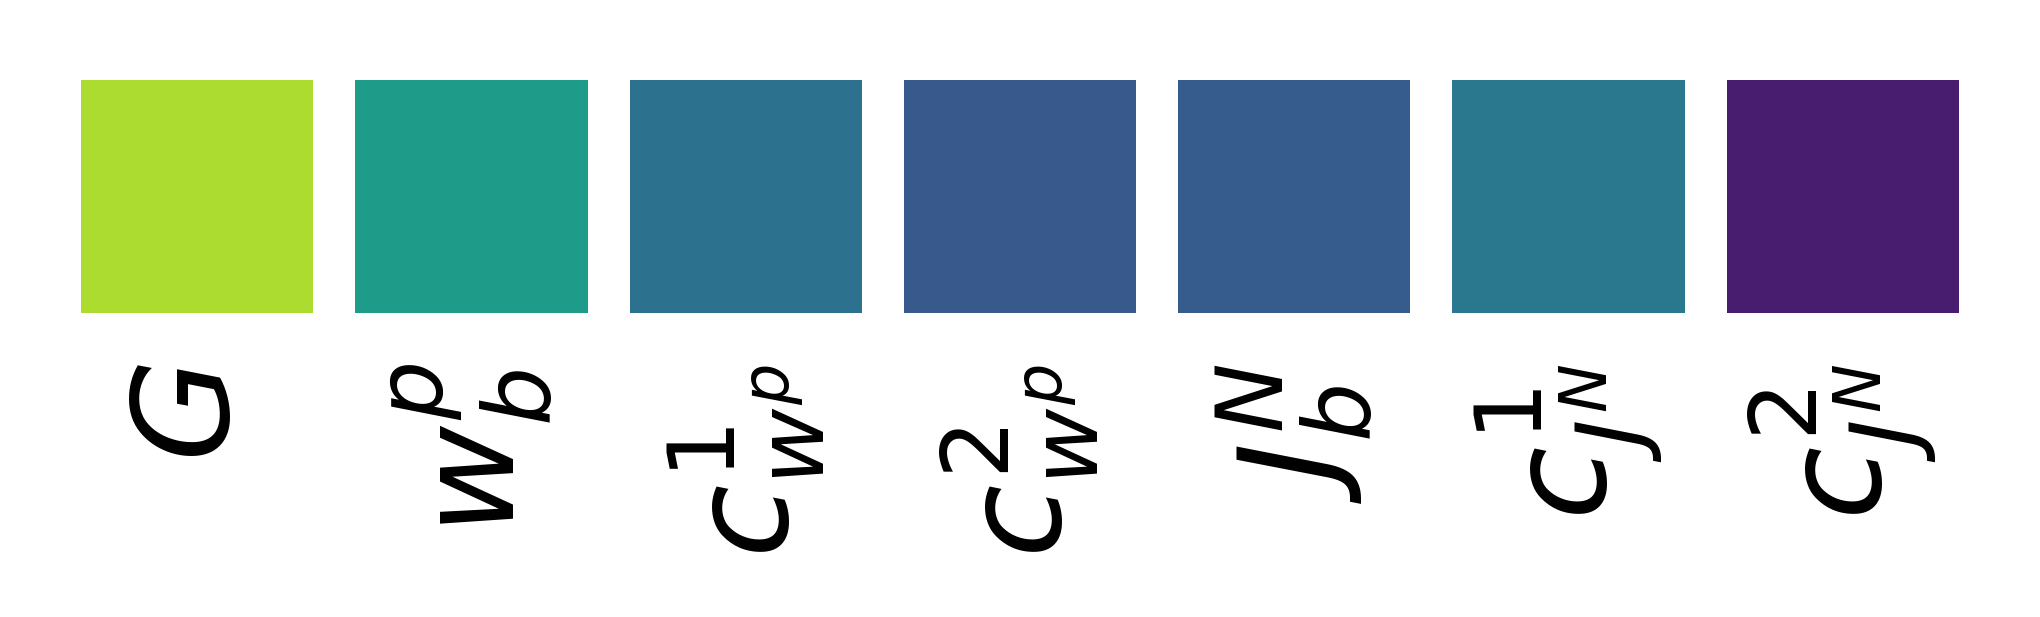

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 1.0))
vmin = -1
vmax = 3
plot_data = pd.Series(example_params).to_frame().T
sns.heatmap(plot_data, ax=ax, cbar=False, linewidth=5, square=True, cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_yticks([])
ax.set_xticklabels(np.vectorize(labels.get)(plot_data.columns), fontsize=16, rotation=90)
ax.tick_params(axis='x', which='both', length=0)
fig.tight_layout()
fig.savefig('maps_params.png', transparent=True)

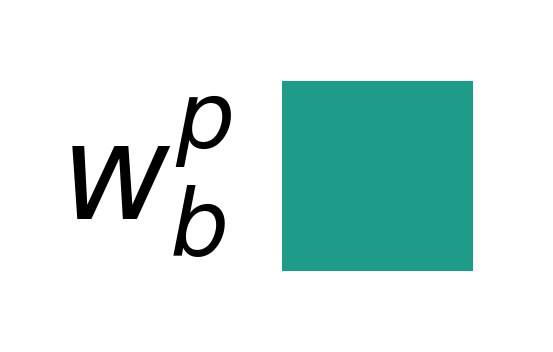

In [6]:
fig, ax = plt.subplots(figsize=(0.5, 3.5))
plot_data = pd.Series(example_params).loc[['w_p']].to_frame()
sns.heatmap(plot_data, ax=ax, cbar=False, cmap='viridis', linewidth=5, square=True, vmin=vmin, vmax=vmax)
ax.set_xticks([])
ax.set_yticklabels(np.vectorize(labels.get)(plot_data.index), rotation=0, fontsize=16)
ax.tick_params(axis='y', which='both', length=0)

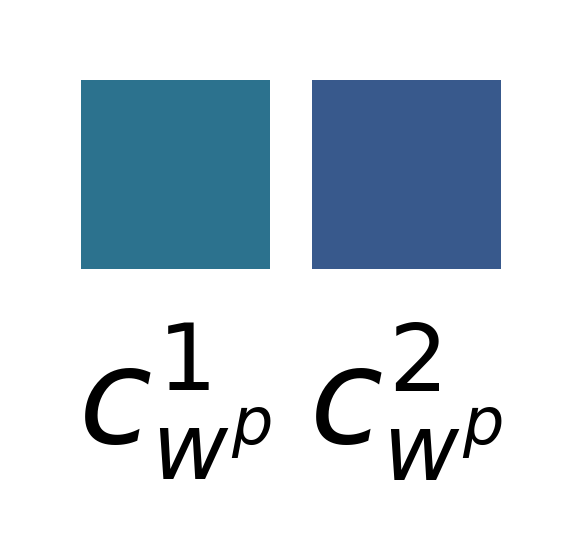

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 0.5))
plot_data = pd.Series(example_params).loc[['w_pscale0', 'w_pscale1']].to_frame().T
sns.heatmap(plot_data, ax=ax, cbar=False, cmap='viridis', linewidth=5, square=True, vmin=vmin, vmax=vmax)
ax.set_yticks([])
ax.set_xticklabels(np.vectorize(labels.get)(plot_data.columns), rotation=0, fontsize=16)
ax.tick_params(axis='x', which='both', length=0)

Maps as matrix:

Text(0.75, 4.35, '...')

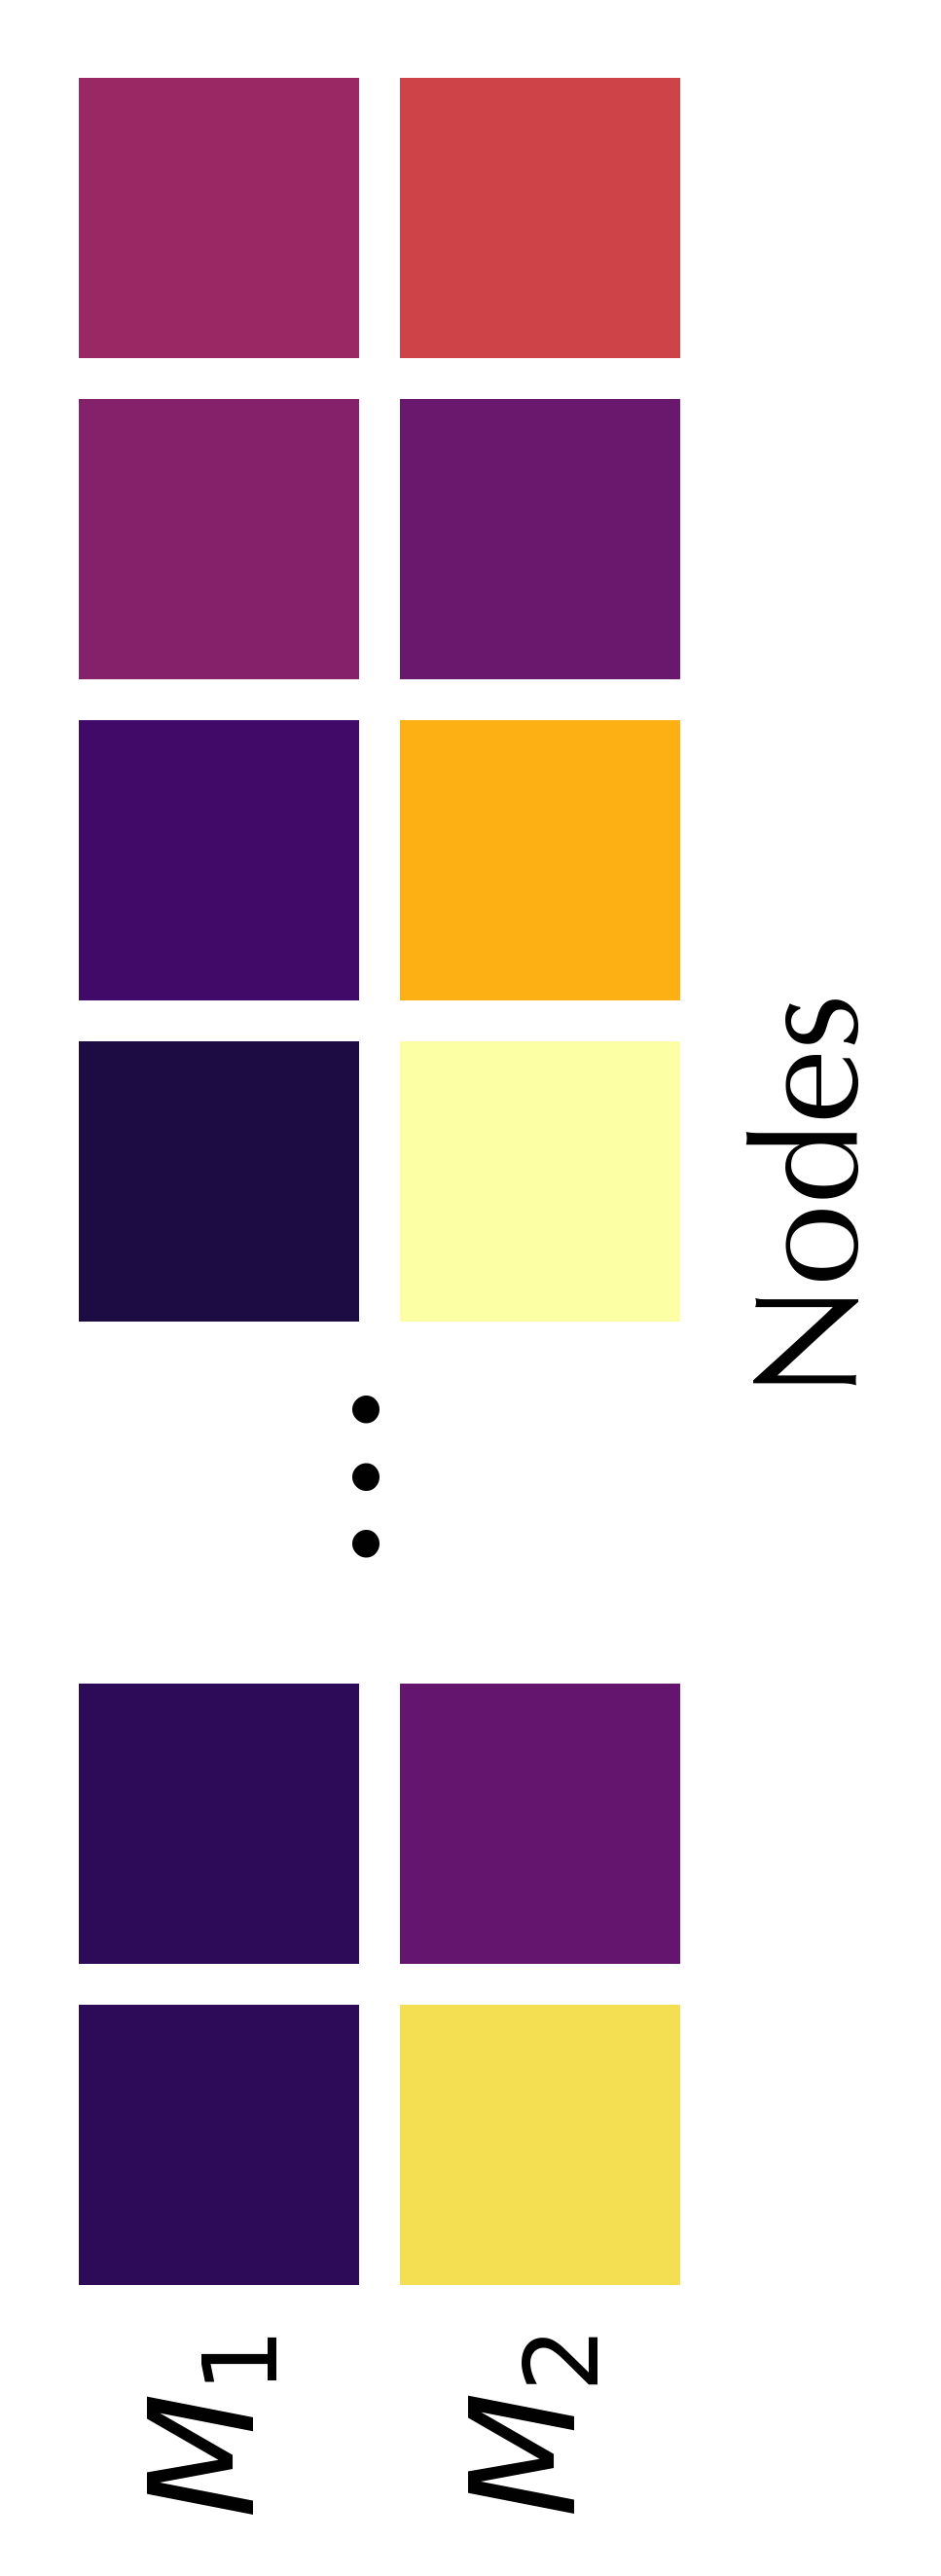

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 5))
plot_data = pd.DataFrame(maps).copy().iloc[:, ::15].T
plot_data.iloc[-3, :] = np.nan
sns.heatmap(plot_data, ax=ax, cbar=False, linewidth=5, square=True, vmin=0, vmax=1, cmap='inferno')
ax.set_xticklabels([r'$M_1$', r'$M_2$'], rotation=90, fontsize=18)
ax.set_ylabel('Nodes', fontsize=18)
ax.set_yticklabels(np.vectorize(labels.get)(plot_data.index))
ax.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax.tick_params(axis='x', which='both', length=0)  # Remove y-axis ticks
ax.yaxis.set_label_position("right")   # Set label position
ax.text(
    0.75, 4.35, '...',
    fontsize=30, color='black', rotation='vertical', ha='center', va='center',
)

Regional parameters vectors:

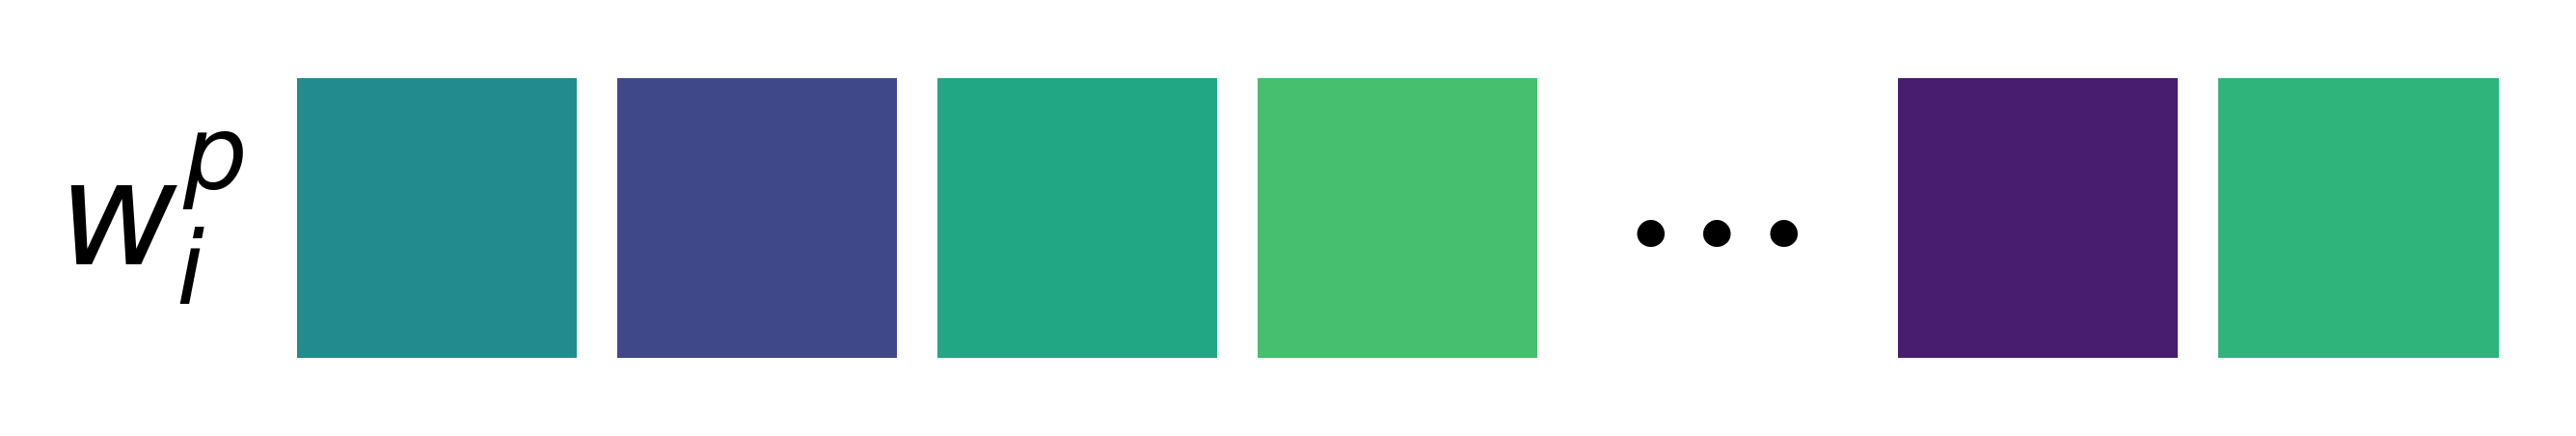

In [10]:
# convert example parameters to a 2D array
Xt = pd.Series(example_params).to_frame().T.values
# transform them to normalized space
X = cmaes.problem._get_X(Xt)
# get regional parameters
regional_params = cmaes.problem._get_sim_params(X)

fig, ax = plt.subplots(figsize=(5, 1.5))
plot_data = pd.DataFrame(regional_params['w_p']).iloc[:, ::15].copy()
plot_data.iloc[:, -3] = np.nan
sns.heatmap(plot_data, cmap='viridis', ax=ax, cbar=False, linewidth=5, square=True, vmin=regional_params['w_p'].min(), vmax=regional_params['w_p'].max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(r'$w_i^p$', fontsize=18, rotation=0, ha='right', va='center')
# ax.set_title(r'$w_i^p$', fontsize=18)
# ax.set_xlabel('Nodes', fontsize=18)
ax.text(
    4.5, 0.4, '...',
    fontsize=30, color='black', rotation='horizontal', ha='center', va='center',
)
# fig.tight_layout()
fig.savefig('w_nodes.png', transparent=True)

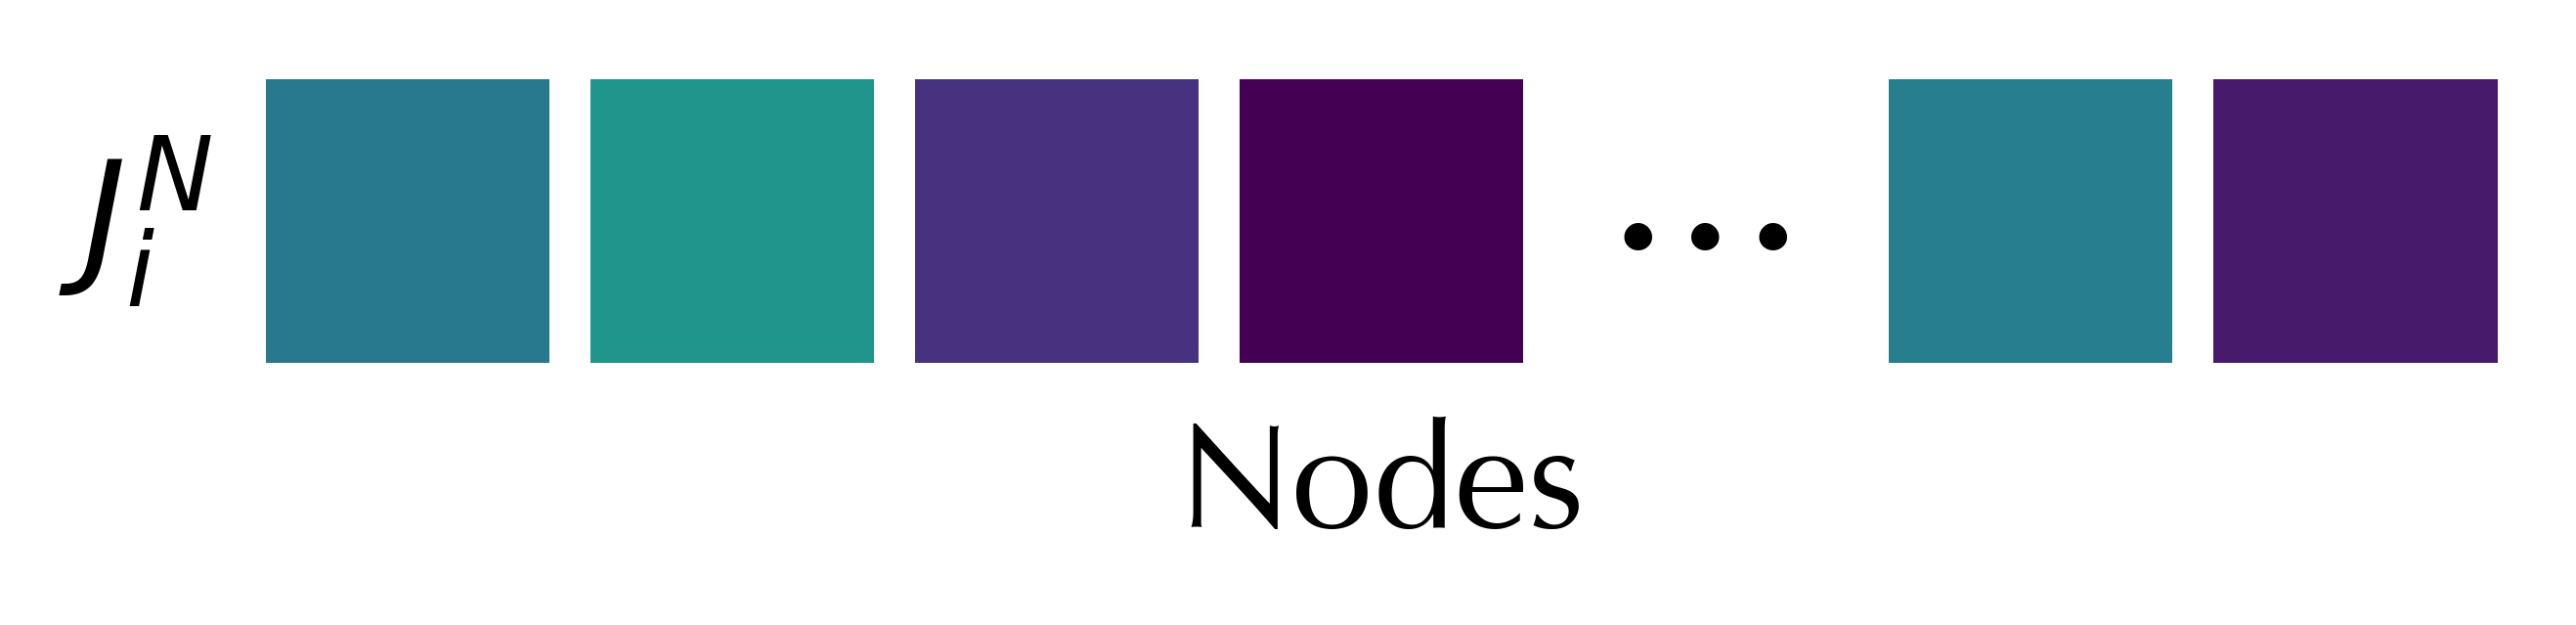

In [11]:
fig, ax = plt.subplots(figsize=(5, 1.5))
plot_data = pd.DataFrame(regional_params['J_N']).iloc[:, ::15].copy()
plot_data.iloc[:, -3] = np.nan
sns.heatmap(plot_data, cmap='viridis', ax=ax, cbar=False, linewidth=5, square=True, vmin=regional_params['J_N'].min(), vmax=regional_params['J_N'].max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(r'$J_i^N$', fontsize=18, rotation=0, ha='right', va='center')
# ax.set_title(r'$w_i^p$', fontsize=18)
ax.set_xlabel('Nodes', fontsize=18)
ax.text(
    4.5, 0.4, '...',
    fontsize=30, color='black', rotation='horizontal', ha='center', va='center',
)
# fig.tight_layout()
fig.savefig('J_nodes.png', transparent=True)

## Maps on surface

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


2025-11-04 19:30:18.256 (  75.338s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:385   WARN| vtkEGLRenderWindow (0x25c6b2b0): Setting an EGL display to device index: -1 require EGL_EXT_device_base EGL_EXT_platform_device EGL_EXT_platform_base extensions
2025-11-04 19:30:18.257 (  75.338s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:390   WARN| vtkEGLRenderWindow (0x25c6b2b0): Attempting to use EGL_DEFAULT_DISPLAY...
2025-11-04 19:30:18.257 (  75.338s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:395   WARN| vtkEGLRenderWindow (0x25c6b2b0): Could not initialize a device. Exiting...
2025-11-04 19:30:18.257 (  75.339s) [    14F790B7EB80]vtkOpenGLRenderWindow.c:793   WARN| vtkEGLRenderWindow (0x25c6b2b0): Failed to initialize OpenGL functions!
2025-11-04 19:30:18.257 (  75.339s) [    14F790B7EB80]vtkOpenGLRenderWindow.c:812   WARN| vtkEGLRenderWindow (0x25c6b2b0): Unable to find a valid OpenGL 3.2 or later implementation. Please update your video card driver to the latest version. If you are using

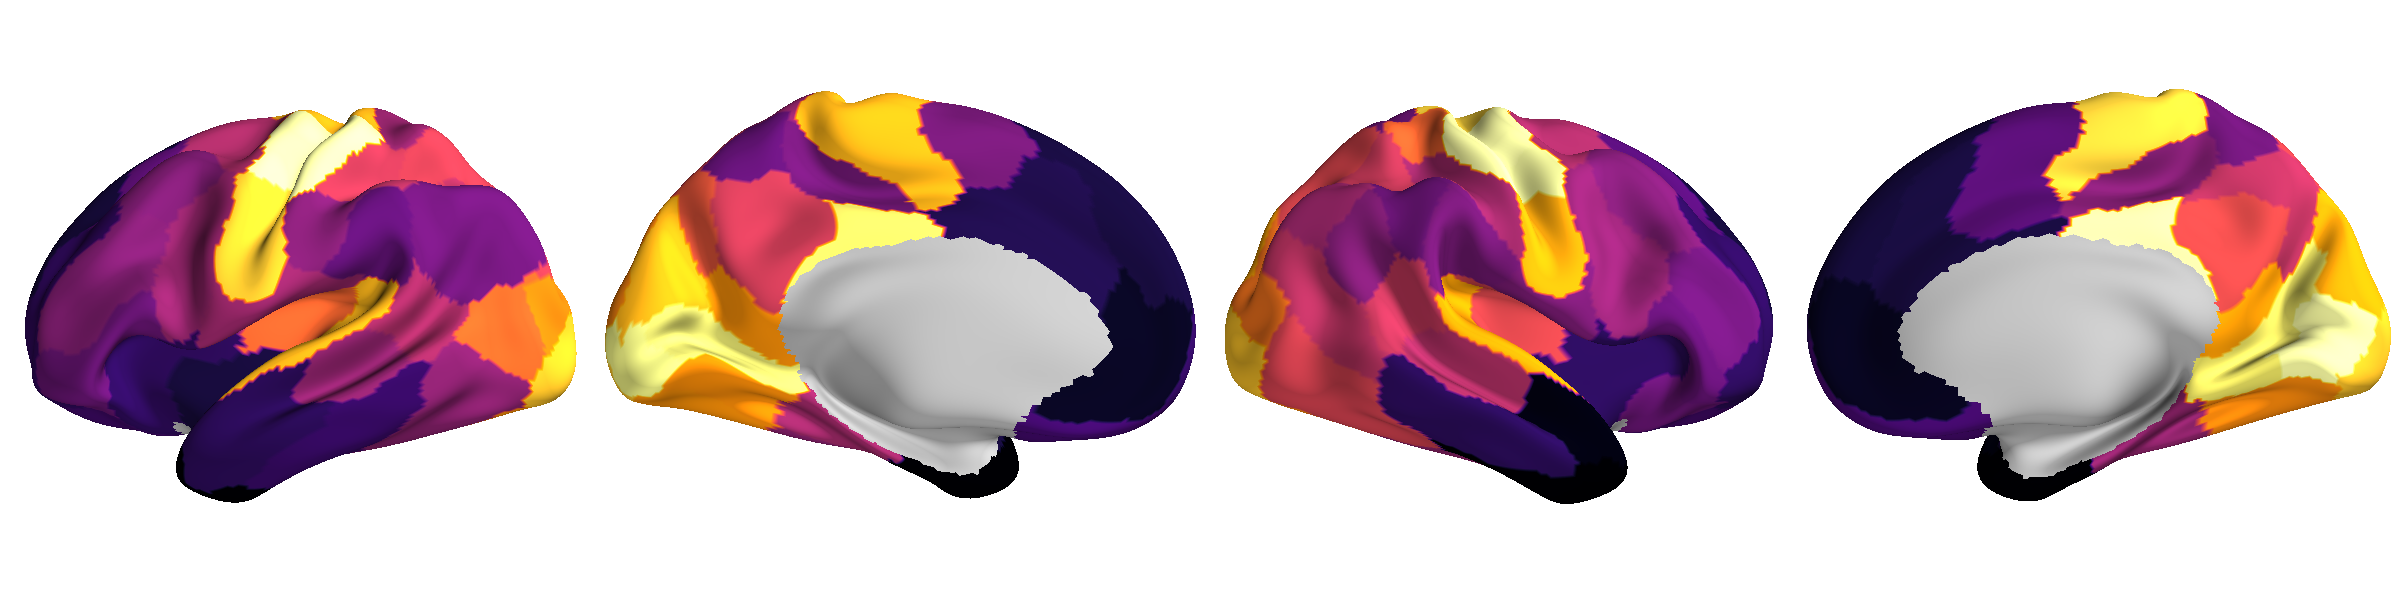

In [8]:
plotter = cubnm_paper.utils.plot_parc(maps[0], cmap='inferno')
_ = plotter.screenshot('T1wT2w_surf.png', transparent_background=True)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


2025-11-04 19:30:56.148 ( 113.230s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:385   WARN| vtkEGLRenderWindow (0x25c6b2b0): Setting an EGL display to device index: -1 require EGL_EXT_device_base EGL_EXT_platform_device EGL_EXT_platform_base extensions
2025-11-04 19:30:56.148 ( 113.230s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:390   WARN| vtkEGLRenderWindow (0x25c6b2b0): Attempting to use EGL_DEFAULT_DISPLAY...
2025-11-04 19:30:56.148 ( 113.230s) [    14F790B7EB80] vtkEGLRenderWindow.cxx:395   WARN| vtkEGLRenderWindow (0x25c6b2b0): Could not initialize a device. Exiting...
2025-11-04 19:30:56.149 ( 113.231s) [    14F790B7EB80]vtkOpenGLRenderWindow.c:793   WARN| vtkEGLRenderWindow (0x25c6b2b0): Failed to initialize OpenGL functions!
2025-11-04 19:30:56.149 ( 113.231s) [    14F790B7EB80]vtkOpenGLRenderWindow.c:812   WARN| vtkEGLRenderWindow (0x25c6b2b0): Unable to find a valid OpenGL 3.2 or later implementation. Please update your video card driver to the latest version. If you are using

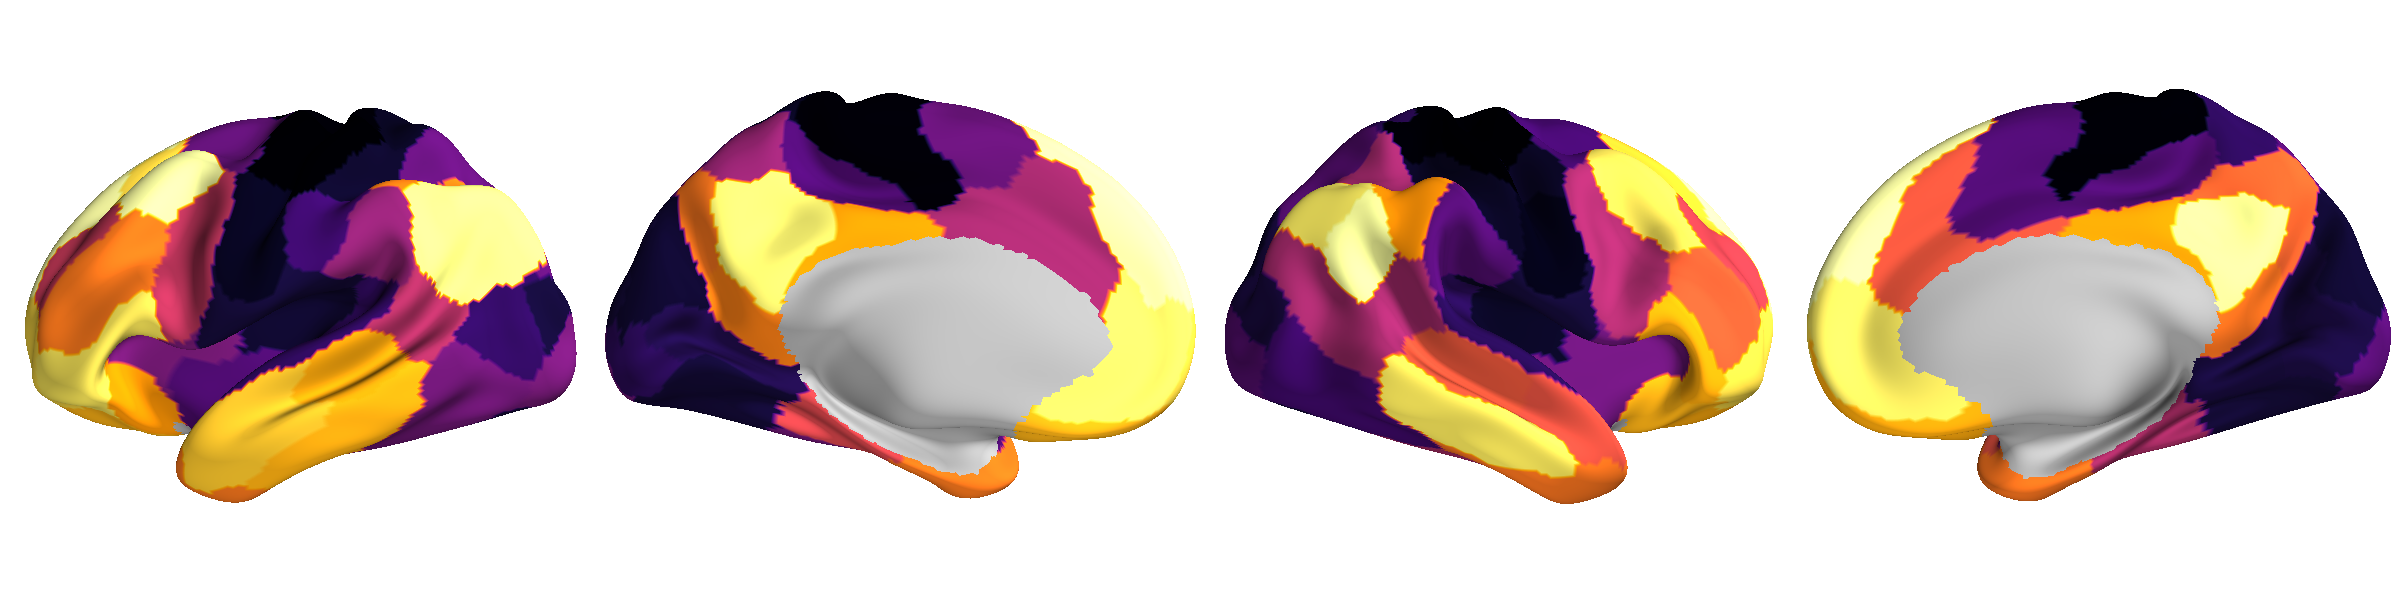

In [9]:
plotter = cubnm_paper.utils.plot_parc(maps[1], cmap='inferno')
_ = plotter.screenshot('FCG1_surf.png', transparent_background=True)

# B-C. Cost and parameters history

In [12]:
# transform history parameters to normalized space
hist_X = cmaes.problem._get_X(cmaes.history.loc[:, cmaes.problem.free_params])
# convert optimizer parameters (n = 7) to model parameters (n = 1 + 100 + 100)
# by calling `_get_sim_params()` method
hist_params = cmaes.problem._get_sim_params(hist_X)

/tmp/ipykernel_10598/1591044200.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
/tmp/ipykernel_10598/1591044200.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


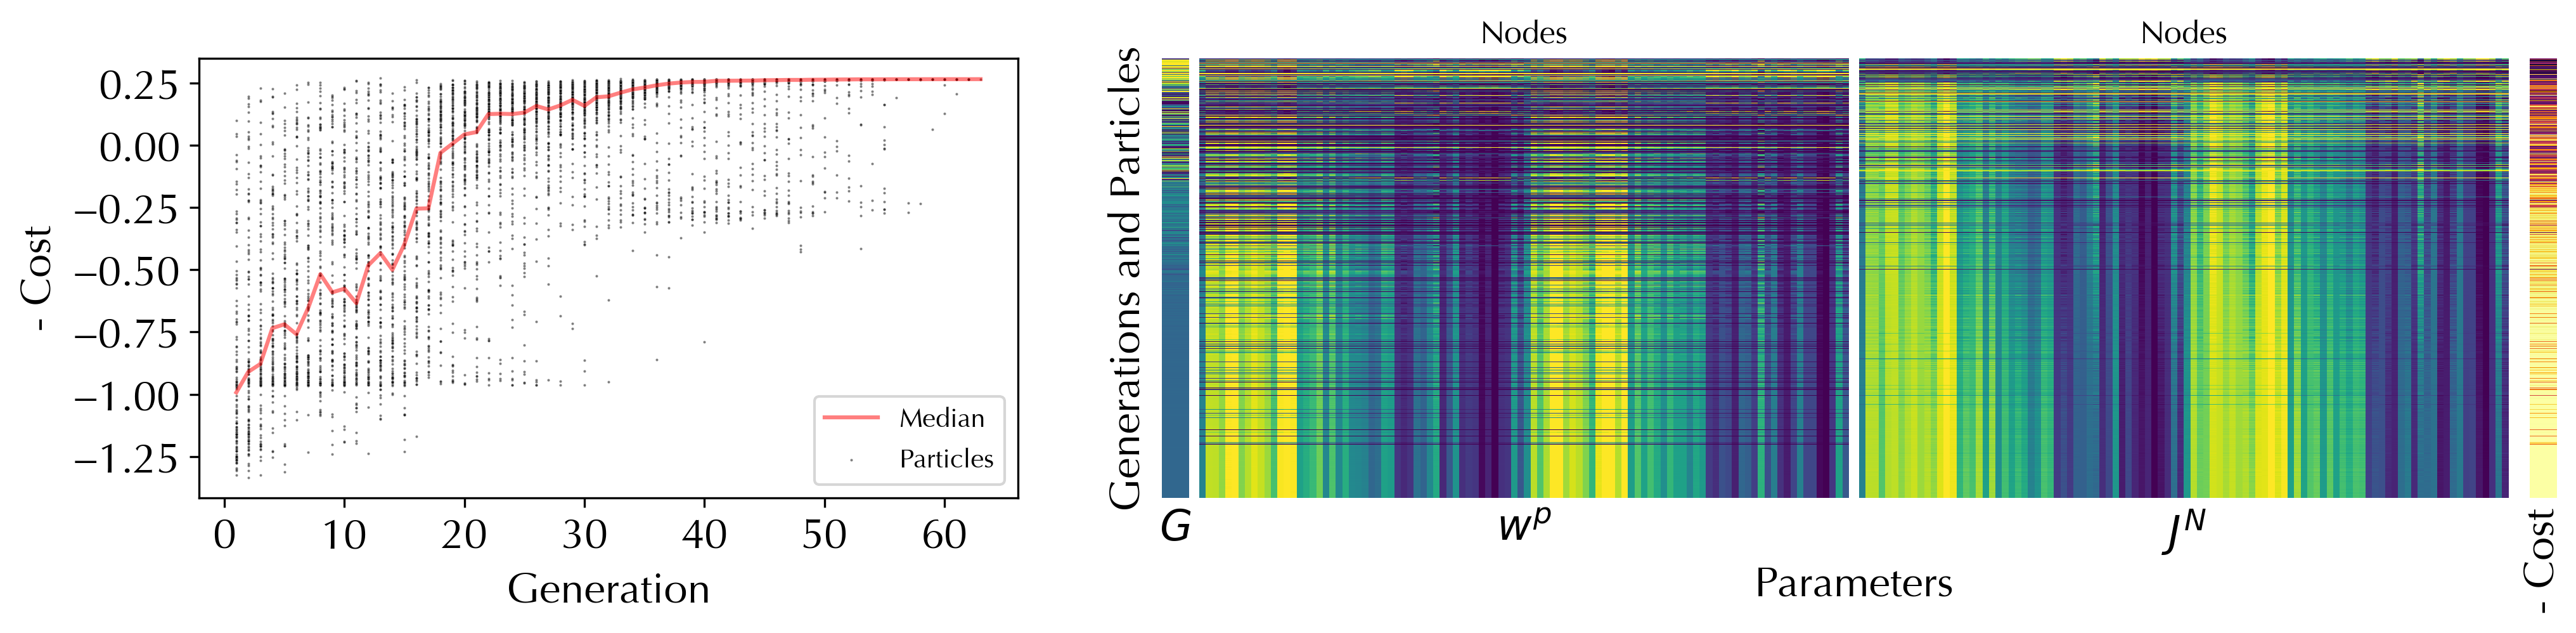

In [13]:
fig, axd = plt.subplot_mosaic(
    [["hist"] + ["space0"] + ["G"] + ["space1"] + ["w_p"] * 100 + ["title"] + ["J_N"] * 100 + ["space2"] + ["fit"]],
    gridspec_kw=dict(width_ratios=[300] + [50] + [10] + [1] * 202 + [5, 10]),
    figsize=(16, 3), dpi=300
)

# Left: cost history

ax = axd['hist']
cmaes.plot_history(
    '-cost', 
    scatter_kws=dict(
        s=1,
    ),
    ax=ax
)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Right: history of global/regional parameters and associated cost
# plot normalized cost
hist_fit = -cmaes.history.loc[:, ['cost']]
hist_fit = (hist_fit - hist_fit.min(axis=0)) / (hist_fit.max(axis=0) - hist_fit.min(axis=0))

vmins = {
    'G': np.nanmin(hist_params['G']),
    'w_p': np.nanmin(hist_params['w_p']),
    'J_N': np.nanmin(hist_params['J_N']),
    'fit': 0,
}
vmaxs = {
    'G': np.nanquantile(hist_params['G'], 0.95),
    'w_p': np.nanquantile(hist_params['w_p'], 0.95),
    'J_N': np.nanquantile(hist_params['J_N'], 0.95),
    'fit': 1
}

# plot separate heatmaps for each parameter+cost
sns.heatmap(hist_params['G'][:, None], ax=axd['G'], cbar=False, cmap='viridis', vmin=vmins['G'], vmax=vmaxs['G'])
axd['G'].set_xlabel(r'$G$', fontsize=16)
sns.heatmap(hist_params['w_p'][:, :], ax=axd['w_p'], cbar=False, cmap='viridis', vmin=vmins['w_p'], vmax=vmaxs['w_p'])
axd['w_p'].set_xlabel(r'$w^{p}$', fontsize=16)
sns.heatmap(hist_params['J_N'][:, :], ax=axd['J_N'], cbar=False, cmap='viridis', vmin=vmins['J_N'], vmax=vmaxs['J_N'])
axd['J_N'].set_xlabel(r'$J^{N}$', fontsize=16)
sns.heatmap(hist_fit, ax=axd['fit'], cbar=False, cmap='inferno', vmin=0, vmax=1)
axd['fit'].set_xlabel('- Cost', fontsize=16, rotation=90)

# title and aesthetics
axd['title'].set_xlabel('Parameters', fontsize=16, labelpad=25)
for name, ax in axd.items():
    if name == 'hist':
        continue
    sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)
    ax.set_xticks([])
    ax.set_yticks([])
axd['G'].set_ylabel('Generations and Particles', fontsize=16)
axd['w_p'].set_title('Nodes', fontsize=12)
axd['J_N'].set_title('Nodes', fontsize=12)
fig.subplots_adjust(wspace=0.5)
fig.savefig('cmaes_het_map_hist_both.png', transparent=True, bbox_inches='tight')

In [18]:
cmaes.history

,index,G,w_p,J_N,w_pscale0,w_pscale1,J_Nscale0,J_Nscale1,cost,+fc_corr,-fcd_ks,+gof,-fic_penalty,gen
0,0,7.028483,1.739241,0.163270,4.206097,-1.704914,-1.938661,4.683329,1.248324,0.149362,-0.919238,-0.769876,-0.478448,1
1,1,3.277412,0.265874,0.435215,4.428255,2.465219,0.125254,-4.842653,0.264739,0.344086,-0.267686,0.076400,-0.341139,1
2,2,7.819848,0.801580,0.307367,1.327847,3.195315,0.954364,-0.844889,1.251323,0.178394,-0.930420,-0.752025,-0.499298,1
3,3,6.802888,1.893674,0.106346,-2.683364,-2.504139,-2.588531,-2.110016,0.676215,0.244119,-0.920334,-0.676215,0.000000,1
4,4,2.192737,1.500714,0.459109,1.200894,-4.279101,0.928386,1.012955,0.538026,0.321531,-0.539470,-0.217939,-0.320087,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932,124,1.137059,1.667906,0.495034,4.986820,-4.997068,0.989350,-4.910246,-0.265156,0.507135,-0.186628,0.320508,-0.055352,62
7933,125,1.137163,0.972094,0.499971,4.932990,-4.977803,0.921082,-4.747524,-0.264993,0.507108,-0.186784,0.320324,-0.055331,62
7934,126,1.136678,1.914475,0.470977,4.990103,-4.986481,0.922345,-4.363277,-0.265014,0.507216,-0.186771,0.320445,-0.055432,62
7935,127,1.136691,1.973598,0.499327,4.990217,-4.999994,0.907755,-4.228289,-0.265098,0.507287,-0.186674,0.320613,-0.055514,62


# Text. Test fit

Create a `rWWSimGroup` using test dataset's SC, apply optimal parameters (obtained from the train dataset), and assess its score against empirical FC and FCD of test dataset:

In [3]:
test_data = dict(
    sc = cubnm.datasets.load_sc('strength', sub='group-test303'),
    emp_fc_tril = cubnm.datasets.load_fc(sub='group-test303', exc_interhemispheric=True),
    emp_fcd_tril = cubnm.datasets.load_fcd(sub='group-test303', exc_interhemispheric=True)
)

sim_options = copy.deepcopy(cubnm_paper.config.HCP_SIM_OPTIONS)

test_sg = cubnm.sim.rWWSimGroup(
    sc = test_data['sc'],
    **sim_options
)

# set N and parameters
test_sg.N = 1
test_sg.param_lists['G'] = cmaes.opt_sim_data['G'].copy()
test_sg.param_lists['w_p'] = cmaes.opt_sim_data['w_p'].copy()
test_sg.param_lists['J_N'] = cmaes.opt_sim_data['J_N'].copy()
test_sg._set_default_params(missing=True) # default parameters (sigma)
# run and score simulation
test_sg.run()
score = test_sg.score(
    emp_fc_tril=test_data['emp_fc_tril'],
    emp_fcd_tril=test_data['emp_fcd_tril']
)
# add cost
score['cost'] = -(score['+gof'] + score['-fic_penalty'])
score.round(3)

Initializing CPU session...
Precalculating 60000000 noise elements...
noise will be repeated 30 times (nodes [rows] and timepoints [columns] will be shuffled in each repeat)
took 2.869656 s
Running 1 simulations...
nodes: 100
N_SIMS: 1
N_SCs: 1
BOLD_TR: 720
states_sampling: 720
time_steps: 900000
do_delay: 0
sim_seed: 0
exc_interhemispheric: 1
verbose: 1
progress_interval: 500
bold_remove_s: 30
drop_edges: 1
ext_out: 1
do_fc: 1
do_fcd: 1
states_ts: 0
noise_time_steps: 30000
Thread 0 (of 12) is executing particle 0 [08:42:54]
Simulations completed
Simulations and calculation of FC and FCD took 118.046798 s


,+fc_corr,-fcd_ks,+gof,-fic_penalty,cost
0,0.496,-0.194,0.302,-0.044,-0.258
